# Interannual variability of precipitation - code
> all the code I used to produce the figures in the lectures

- toc: true 
- badges: true
- comments: false
- categories: [jupyter, hydrology]
- tags: [science]

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request

In [2]:
def download_data(station_name, station_code):
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    # download daily data
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                               station_name + '_daily.csv')
    # download monthly data
    urllib.request.urlretrieve(url_monthly + station_code + '.csv',
                               station_name + '_monthly.csv')

In [3]:
df = pd.read_csv("TEL AVIV READING_monthly.csv", sep=",")
# make 'DATE' the dataframe index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,...,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1939-11-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,106.5,",,,E",NaN,NaN,NaN,NaN,NaN,NaN
1939-12-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,100.1,",,,E",NaN,NaN,NaN,NaN,NaN,NaN
1940-01-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,181.5,",,,E",NaN,NaN,NaN,NaN,NaN,NaN
1940-02-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,57.7,",,,E",NaN,NaN,NaN,NaN,NaN,NaN
1940-03-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,27.2,",,,E",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-05-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",165.9,NaN,125.0,",I",NaN,...,0.0,",I",NaN,NaN,22.37,",I",26.15,",,,I",18.58,",,,I"
1999-06-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",367.1,NaN,201.2,"1,I",NaN,...,0.0,"1,I",NaN,NaN,25.29,"1,I",28.93,"1,,,I",21.65,",,,I"
1999-07-01,IS000002011,32.1,34.7831,3.0,"TEL AVIV READING, IS",612.0,NaN,244.9,"4,I",NaN,...,0.0,"4,I",NaN,NaN,27.44,"4,I",31.09,"4,,,I",23.80,",,,I"


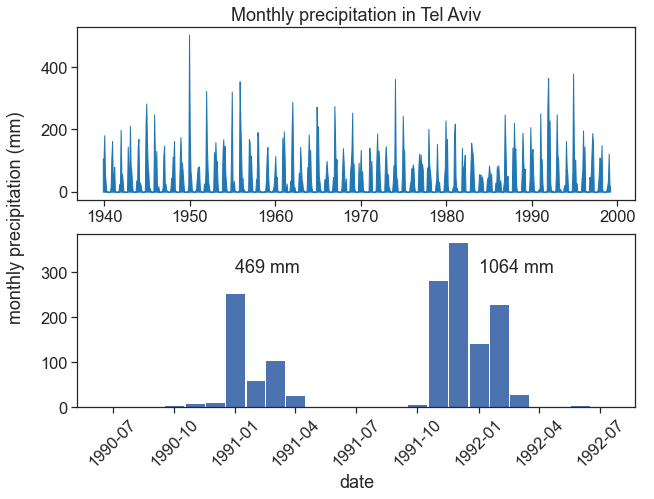

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))

# plot precipitation
ax1.fill_between(df.index, df['PRCP'], 0, color='tab:blue')
df_1990_1992 = df.loc['1990-07-01':'1992-07-01']
ax2.bar(df_1990_1992.index, df_1990_1992['PRCP'], width=30)

# adjust labels, ticks, title, etc
ax1.set_title("Monthly precipitation in Tel Aviv")
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel("date")

# dirty trick to get common y label between the two panels:
# make a large invisible axes, give it a ylabel
ax0 = fig.add_subplot(111, frame_on=False)
ax0.tick_params(labelcolor="none", bottom=False, left=False)
ax0.set_ylabel("monthly precipitation (mm)", labelpad=20)

# write yearly rainfall
rain_1990_1991 = df.loc['1990-07-01':'1991-07-01','PRCP'].sum()
rain_1991_1992 = df.loc['1991-07-01':'1992-07-01','PRCP'].sum()
ax2.text('1991-01-01', 300, "{:.0f} mm".format(rain_1990_1991))
ax2.text('1992-01-01', 300, "{:.0f} mm".format(rain_1991_1992))

# save figure
plt.savefig("monthly_tel_aviv_1940-1999.png")

## hydrological year

A time period of 12 months for which precipitation totals are measured. The water year is designated by the calendar year in which it **ends**.  
Let's define the hydrological year for Tel Aviv from 1 October to 30 September.

In [5]:
# read more about resampling options
# https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#offset-aliases
# also, annual resampling can be anchored to the end of specific months:
# https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#anchored-offsets
df_year_all = df['PRCP'].resample('A-SEP').sum().to_frame()  # annual frequency, anchored end of September
df_year_all.columns = ['rain (mm)'] # rename 'PRCP' column to 'rain (mm)'
df_year_all

,rain (mm)
DATE,
1940-09-30,474.9
1941-09-30,447.8
1942-09-30,372.9
1943-09-30,618.2
1944-09-30,440.5
...,...
1996-09-30,488.2
1997-09-30,619.1
1998-09-30,489.6


In [6]:
# the last year is the sum of only on month (November), let's take it out
df_year = df_year_all.iloc[:-1]  # exclude last row
df_year.tail()  # show "tail" of the dataframe to see that year 2000 was excluded

,rain (mm)
DATE,
1995-09-30,804.7
1996-09-30,488.2
1997-09-30,619.1
1998-09-30,489.6
1999-09-30,226.5


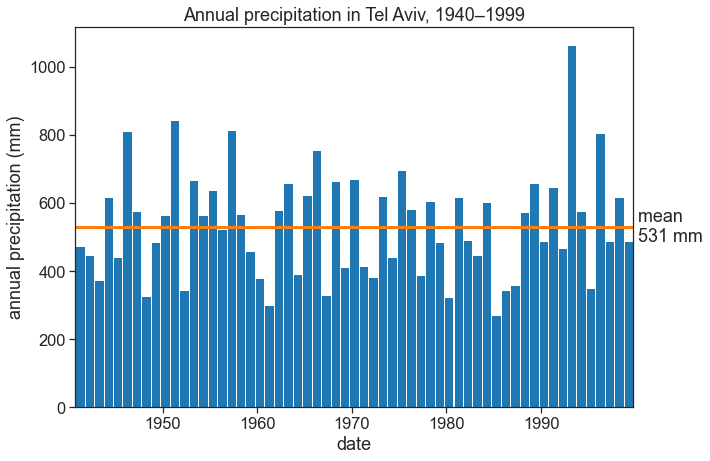

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY precipitation
ax.bar(df_year.index, df_year['rain (mm)'],
       width=365, align='edge', color="tab:blue")

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange")

# adjust labels, ticks, title, etc
ax.set_title("Annual precipitation in Tel Aviv, 1940–1999")
ax.set_xlabel("date")
ax.set_ylabel("annual precipitation (mm)")
ax.set_xlim([df_year.index[0], df_year.index[-1]])

# write mean on the right
ax.text(df_year.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")

# save figure
plt.savefig("annual_tel_aviv_with_mean.png")

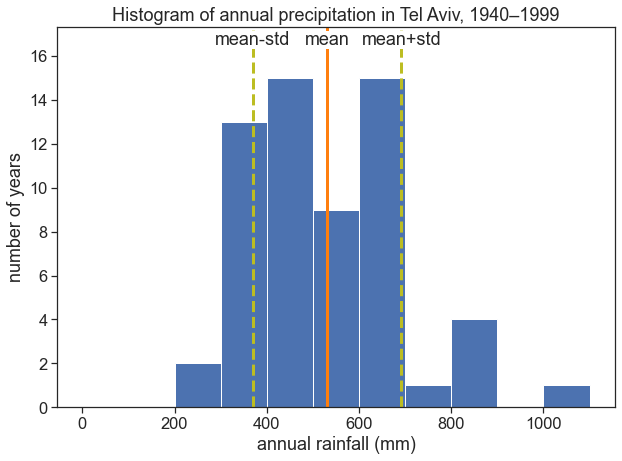

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

# calculate mean and standard deviation
rain_mean = df_year['rain (mm)'].mean()
rain_std = df_year['rain (mm)'].std()

# plot histogram
b = np.arange(0, 1101, 100)  # bins from 0 to 55, width = 5
ax.hist(df_year, bins=b)

# plot vertical lines with mean, std, etc
ylim = np.array(ax.get_ylim())
ylim[1] = ylim[1]*1.1
ax.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax.set_ylim(ylim)

# write mean, std, etc
ax.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))

# adjust labels, ticks, title, limits, etc
ax.set_title("Histogram of annual precipitation in Tel Aviv, 1940–1999")
ax.set_xlabel("annual rainfall (mm)")
ax.set_ylabel("number of years")

# save figure
plt.savefig("histogram_tel_aviv_with_mean_and_std.png")

## coefficient of variation

$\langle{P}\rangle=$ average precipitation  
$\sigma=$ standard deviation

$$CV = \frac{\sigma}{\langle{P}\rangle}$$

Assuming that the inter-annual distribution is a gaussian: 67% of the time, rainfall will vary +/- 30% from its long term average in Tel Aviv.

In [9]:
CV = rain_std / rain_mean
print(f"CV = {CV:.2f}")
# rain_mean

CV = 0.30


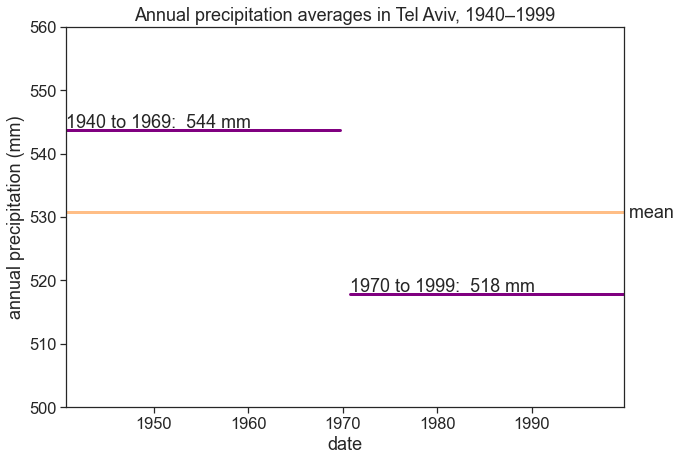

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

# windows of length 30 years
windows = [[1940,1969], [1970,1999]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['rain (mm)'][start_date:end_date].mean()
    ax.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm")

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")

# adjust labels, ticks, title, limits, etc
ax.set_title("Annual precipitation averages in Tel Aviv, 1940–1999")
ax.set_xlabel("date")
ax.set_ylabel("annual precipitation (mm)")
ax.set_xlim([df_year.index[0], df_year.index[-1]])
ax.set_ylim([500, 560])

# save figure
plt.savefig("mean_tel_aviv_2_windows.png")

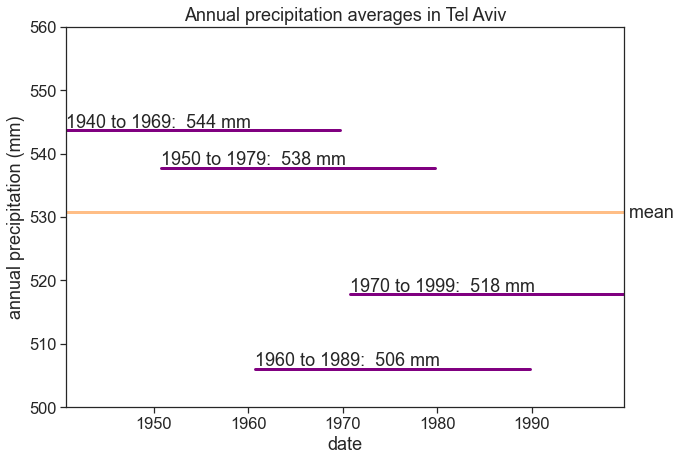

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

# windows of length 30 years
windows = [[x,x+29] for x in [1940,1950,1960,1970]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['rain (mm)'][start_date:end_date].mean()
    ax.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm")

# plot mean
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")

# adjust labels, ticks, title, limits, etc
ax.set_title("Annual precipitation averages in Tel Aviv")
ax.set_xlabel("date")
ax.set_ylabel("annual precipitation (mm)")
ax.set_xlim([df_year.index[0], df_year.index[-1]])
ax.set_ylim([500, 560])

# save figure
plt.savefig("mean_tel_aviv_4_windows.png")

In [12]:
import altair as alt
from vega_datasets import data

# Altair only recognizes column data; it ignores index values. You can plot the index data by first resetting the index
source = df_year.reset_index()
brush = alt.selection(type='interval', encodings=['x'])

# T: temporal, a time or date value
# Q: quantitative, a continuous real-valued quantity
# https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types
bars = alt.Chart().mark_bar().encode(
    x=alt.X('DATE:T', axis=alt.Axis(title='date')),
    y=alt.Y('rain (mm):Q',  axis=alt.Axis(title='annual precipitation (mm) and average')),
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.2)),
).add_selection(
    brush
).properties(
    title='Select year range and drag for rolling average of annual precipitation in Tel Aviv'
).properties(
    width=600,
    height=400
)

line = alt.Chart().mark_rule(color='orange').encode(
    y='mean(rain (mm)):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)

alt.LayerChart(...)

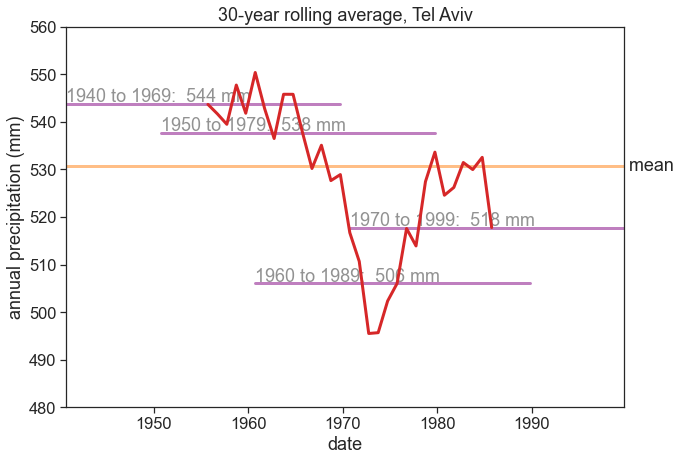

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

rolling_mean = df_year.rolling(30, center=True).mean()
ax.plot(rolling_mean, linewidth=3, color="tab:red", zorder=5)

ax.set_title("30-year rolling average, Tel Aviv")
ax.set_xlabel("date")
ax.set_ylabel("annual precipitation (mm)")

# windows of length 30 years
windows = [[x,x+29] for x in [1940,1950,1960,1970]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['rain (mm)'][start_date:end_date].mean()
    ax.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm", alpha=0.5)
ax.set_ylim([480, 560])

# plot mean
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
ax.set_xlim([df_year.index[0], df_year.index[-1]])

# save figure
plt.savefig("rolling_average_tel_aviv.png")

In [14]:
rolling_mean

,rain (mm)
DATE,
1940-09-30,NaN
1941-09-30,NaN
1942-09-30,NaN
1943-09-30,NaN
1944-09-30,NaN
1945-09-30,NaN
1946-09-30,NaN
1947-09-30,NaN
1948-09-30,NaN
